<a href="https://colab.research.google.com/github/yl4590/GR5074/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Explore bivariate results (Use visualizations!) -- Describe any relationships you see between particular features and the target variable

In [ ]:
! pip install aimodelshare --upgrade

In [ ]:
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/world_happiness_competition_data-repository:latest') 

In [ ]:
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

In [ ]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000


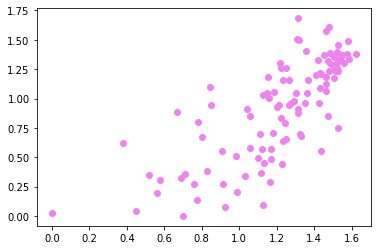

In [ ]:
# Visulization 
import matplotlib.pyplot as plt
plt.scatter(X_train['Social support'], X_train['GDP per capita'], color = 'violet')

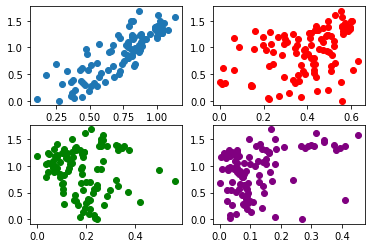

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(X_train['Healthy life expectancy'], X_train['GDP per capita'])
axes[0, 1].scatter(X_train['Freedom to make life choices'], X_train['GDP per capita'], color = 'red')
axes[1, 0].scatter(X_train['Generosity'], X_train['GDP per capita'], color = 'green')
axes[1, 1].scatter(X_train['Perceptions of corruption'], X_train['GDP per capita'], color = 'purple')

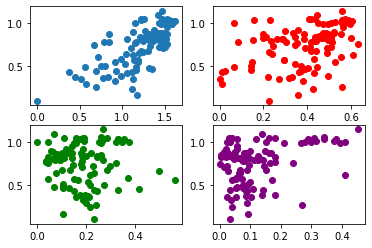

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(X_train['Social support'], X_train['Healthy life expectancy'])
axes[0, 1].scatter(X_train['Freedom to make life choices'], X_train['Healthy life expectancy'], color = 'red')
axes[1, 0].scatter(X_train['Generosity'], X_train['Healthy life expectancy'], color = 'green')
axes[1, 1].scatter(X_train['Perceptions of corruption'], X_train['Healthy life expectancy'], color= 'purple')

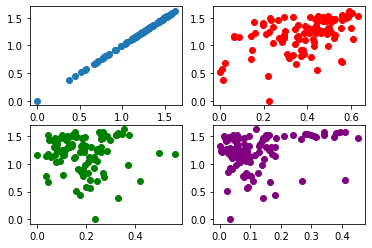

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(X_train['Social support'], X_train['Social support'])
axes[0, 1].scatter(X_train['Freedom to make life choices'], X_train['Social support'], color = 'red')
axes[1, 0].scatter(X_train['Generosity'], X_train['Social support'], color = 'green')
axes[1, 1].scatter(X_train['Perceptions of corruption'], X_train['Social support'], color= 'purple')

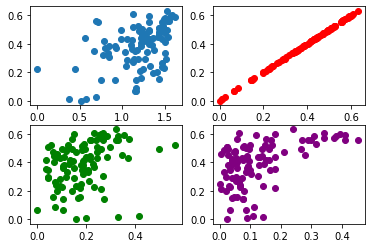

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(X_train['Social support'], X_train['Freedom to make life choices'])
axes[0, 1].scatter(X_train['Freedom to make life choices'], X_train['Freedom to make life choices'], color = 'red')
axes[1, 0].scatter(X_train['Generosity'], X_train['Freedom to make life choices'], color = 'green')
axes[1, 1].scatter(X_train['Perceptions of corruption'], X_train['Freedom to make life choices'], color= 'purple')

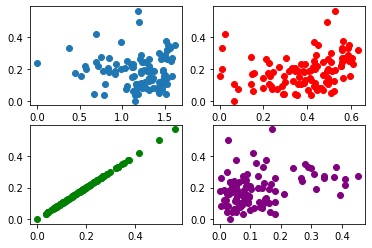

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(X_train['Social support'], X_train['Generosity'])
axes[0, 1].scatter(X_train['Freedom to make life choices'], X_train['Generosity'], color = 'red')
axes[1, 0].scatter(X_train['Generosity'], X_train['Generosity'], color = 'green')
axes[1, 1].scatter(X_train['Perceptions of corruption'], X_train['Generosity'], color= 'purple')

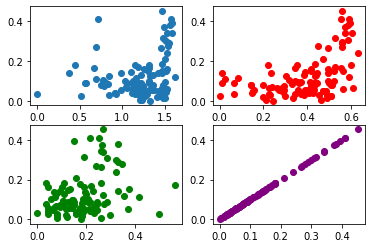

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(X_train['Social support'], X_train['Perceptions of corruption'])
axes[0, 1].scatter(X_train['Freedom to make life choices'], X_train['Perceptions of corruption'], color = 'red')
axes[1, 0].scatter(X_train['Generosity'], X_train['Perceptions of corruption'], color = 'green')
axes[1, 1].scatter(X_train['Perceptions of corruption'], X_train['Perceptions of corruption'], color= 'purple')

### From the graphs above, I found one linear relation between GDP per capita and healthy life expectancy, one log relation between perceptions of corruption and freedom to make life choices.

In [ ]:
# preprocess data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


preprocess=preprocessor.fit(X_train) 

## 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection. -- Explain any meaningful findings

### Feature Elimination with PCA

In [ ]:
import numpy as np
X = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
print(X)

     GDP per capita  ...  Terrorist_attacks
0             1.403  ...         173.000000
1             0.886  ...          18.000000
2             0.380  ...           3.000000
3             1.238  ...         125.611111
4             1.396  ...           1.000000
..              ...  ...                ...
99            1.044  ...        1448.000000
100           0.947  ...           9.000000
101           1.333  ...         339.000000
102           1.029  ...          37.000000
103           0.673  ...         122.000000

[104 rows x 7 columns]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=X.columns)
pca_loadings

,0,1,2,3,4,5,6
GDP per capita,-0.000214,-0.768106,0.484213,0.055826,0.403047,0.087068,0.049050
Social support,-0.000163,-0.491913,-0.770247,-0.373249,0.022903,0.128709,-0.091300
Healthy life expectancy,-0.000138,-0.385470,0.137250,0.077744,-0.881866,-0.192567,0.108452
Freedom to make life choices,-0.000073,-0.120445,-0.364215,0.677474,0.203597,-0.545641,0.233866
Generosity,0.000008,0.008481,-0.136480,0.416000,-0.098962,0.766010,0.460088
Perceptions of corruption,-0.000020,-0.069769,-0.046261,0.468506,-0.089979,0.232972,-0.843281
Terrorist_attacks,1.000000,-0.000308,-0.000030,0.000017,-0.000018,-0.000028,0.000008


In [ ]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), index=X.index)
df_plot.iloc[:,0:2]

,0,1
0,-133.168034,-0.441718
1,-288.167791,0.368304
2,-303.167653,0.835248
3,-180.556902,-0.363173
4,-305.168089,-0.566877
...,...,...
99,1141.832008,-0.483495
100,-297.167849,0.193914
101,32.831914,-0.614865
102,-269.167928,-0.044016


In [ ]:
np.sqrt(pca.explained_variance_)
pca.explained_variance_
pca.explained_variance_ratio_

array([9.99999396e-01, 4.55477550e-07, 6.10827131e-08, 4.11156647e-08,
       2.18103031e-08, 1.41655152e-08, 1.06671951e-08])

PCA does not indicate any clear signs on feature elimination. The first explained less than 0.1% of the variance. 

##3. Run at least three prediction models to try to predict World Happiness well. -- Discuss which models performed better and point out relevant hyper-parameter values for successful models.

In [ ]:
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
preprocessor(X_train).shape

(104, 26)

### Model 1: Random Forest

In [ ]:
# random forest classifier 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=5)
model.fit(preprocessor(X_train), y_train_labels) 
model.score(preprocessor(X_train), y_train_labels) 

0.9615384615384616

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:

from aimodelshare.aimsonnx import model_to_onnx
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] 
initial_type = [('float_input', FloatTensorType([None, feature_count]))] 

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
from aimodelshare.aws import set_credentials
apiurl="https://c3maq947kb.execute-api.us-east-1.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
prediction_labels = model.predict(preprocessor(X_test))

mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): randomforest
Provide any useful notes about your model (optional): randomforest

Your model has been submitted as model version 45

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289


In [ ]:
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

### Tuning parameters to improve the prediction
#### I tuned the n_estimators and max_depth.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=1000, max_depth=5)
model_2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model_2.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9615384615384616

In [ ]:
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] 
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
prediction_labels = model_2.predict(preprocessor(X_test))
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 prediction_submission=prediction_labels,
                                 preprocessor_filepath="preprocessor.zip")

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 3

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289


## Model 2: Cross Validation with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5]} 
gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.626
best parameters: {'max_depth': 5, 'n_estimators': 100}


In [ ]:
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] 
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
prediction_labels = gridmodel.predict(preprocessor(X_test))

mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 4

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289


In [ ]:
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,softmax_act,relu_act,loss,optimizer,model_config,memory_size,username,version
0,50.00%,50.11%,55.99%,50.83%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,"{'bootstrap': True, 'ccp_alpha...",nan,AdvProjectsinML,3
1,46.15%,46.02%,51.79%,46.83%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,"{'bootstrap': True, 'ccp_alpha...",nan,AdvProjectsinML,4
3,44.23%,43.28%,49.76%,46.33%,sklearn,False,False,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,"{'bootstrap': True, 'ccp_alpha...",nan,AdvProjectsinML,2
4,46.15%,45.04%,49.44%,45.85%,keras,False,True,Sequential,4.000000,10373.000000,4.000000,1.000000,3.000000,str,SGD,"{'name': 'sequential', 'layers...",1369568.000000,AdvProjectsinML,1


### Tuning parameters
#### I tuned K value sequence number. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(300, 500, 700),'max_depth':[1, 3, 5]} 

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.637
best parameters: {'max_depth': 5, 'n_estimators': 300}


#### Tuning K value parameters does not improve the score significantly. I turn the depth for the model below.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(300, 500, 700),'max_depth':[3, 5, 7]} 

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.627
best parameters: {'max_depth': 7, 'n_estimators': 300}


Tuning the depth does not improve the score either. Cross validation with GridSearch CV does not look like a successful model for prediciton in this case.

## 4. Submit your best model to the leader board for the World Happiness AI Model Share competition created for this class. Remember to use the instructions on the World Happiness Model Submission Guide notebook, including the specific code to load your train and tests sets.


### Submitted. AI modelshare handle: yl4590